In [2]:
# imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 40)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import plotly.express as px
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore');

In [3]:
df = pd.read_csv("C:/Users/aulee/OneDrive/Documents/cleanedagain7.csv")

In [4]:
df.head()

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Fuel_Tank_Capacity,Fuel_Type,Body_Type,Height,Length,Width,Doors,ARAI_Certified_Mileage,Gears,Ground_Clearance,Seating_Capacity,Type,Airbags,Kerb_Weight,Front_Track,Rear_Track,Power,Torque,Wheelbase,Minimum_Turning_Radius
0,0,Tata,Nano Genx,Xe,236447,624,2,2,RWD,In-line,BS IV,24.0,Petrol,Hatchback,1652.0,3164.0,1750.0,5,23.60,4,180.0,4,Manual,2,725,1325.0,1315.0,93.54,12.75,2230,4.0
1,1,Bajaj,Qute (Re60),Qcar,263000,216,4,1,RWD,In-line,BS IV,45.0,Petrol,Hatchback,1652.0,2752.0,1312.0,4,35.00,5,165.0,4,Manual,2,1785,1143.0,1540.0,85.32,4.73,1925,3.5
2,2,Tata,Nano Genx,Xm,272223,624,2,2,RWD,In-line,BS IV,24.0,Petrol,Hatchback,1652.0,3164.0,1750.0,5,23.60,4,180.0,4,Manual,2,725,1325.0,1315.0,84.21,12.75,2230,4.0
3,3,Datsun,Redi-Go,D,279650,799,3,4,FWD,In-line,BS IV,28.0,Petrol,Hatchback,1541.0,3429.0,1560.0,5,25.17,5,185.0,5,Manual,2,1785,1490.0,1540.0,35.75,16.42,2348,4.7
4,4,Maruti Suzuki,Omni,5,282778,796,3,2,RWD,In-line,BS IV,35.0,Petrol,MPV,1640.0,3370.0,1410.0,5,16.80,4,165.0,5,Manual,2,785,1205.0,1190.0,35.75,23.6,1840,4.1


In [5]:
num_cols = [ i for i in df.columns if df[i].dtype != 'object']
km = KMeans(n_clusters=8, n_init=20, max_iter=400, random_state=0)
clusters = km.fit_predict(df[num_cols])
df['cluster'] = clusters
df.cluster = (df.cluster + 1).astype('object')
df.sample(5)

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Fuel_Tank_Capacity,Fuel_Type,Body_Type,Height,Length,Width,Doors,ARAI_Certified_Mileage,Gears,Ground_Clearance,Seating_Capacity,Type,Airbags,Kerb_Weight,Front_Track,Rear_Track,Power,Torque,Wheelbase,Minimum_Turning_Radius,cluster
1162,1162,Bmw,7-Series,730Ld Design Pure Excellence,12290000,2993,6,4,AWD,V,BS VI,78.0,Diesel,Sedan,1479.0,5120.0,2169.0,4,17.66,8,152.0,4,Automatic,7,1785,1618.0,1646.0,16.07,310,3210,7.50,1
780,780,Toyota,Yaris,Vx Cvt,1418000,1496,4,4,FWD,In-line,BS IV,42.0,Petrol,Sedan,1495.0,4425.0,1730.0,4,17.80,7,152.0,5,Automatic,5,1135,1490.0,1540.0,8.00,33.33,2550,5.10,2
677,677,Ford,Ecosport,1.5L Tdci Titanium S,1145000,1498,3,4,FWD,In-line,BS VI,52.0,Diesel,SUV,1647.0,3998.0,1765.0,5,23.00,5,200.0,5,Manual,5,1242,1490.0,1540.0,14.05,117.14,2519,5.30,2
940,940,Volkswagen,Tiguan,Comfortline 2.0L Tdi Amt,2814500,1968,4,4,AWD,In-line,BS IV,71.0,Diesel,SUV,1672.0,4486.0,1839.0,5,17.06,8,149.0,5,Automatic,6,1720,1578.0,1568.0,92.92,194.29,2677,5.75,2
1225,1225,Land Rover Rover,Range,4.4L Sdv8 Autobiography Lwb Diesel,25174051,4367,8,2,4WD,V,BS IV,45.0,Diesel,SUV,1868.0,5200.0,2073.0,5,23.00,8,295.5,7,Automatic,8,2687,1690.0,1683.0,12.26,422.86,3120,5.20,6


In [6]:
#Analyising Data Features Based On Price

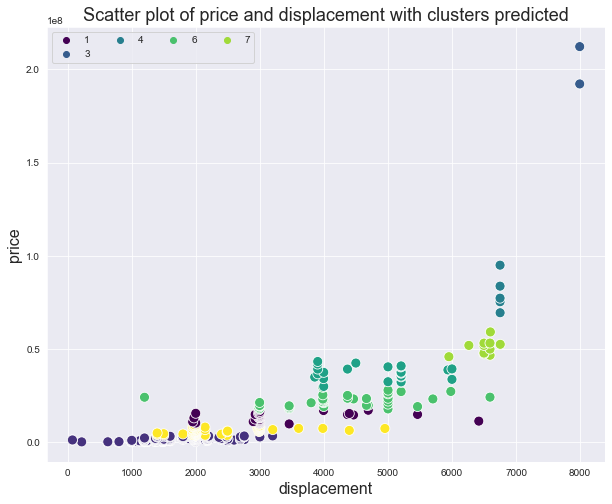

In [7]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, y='Ex-Showroom_Price', x='Displacement',s=100,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of price and displacement with clusters predicted', fontsize=18)
plt.xlabel('displacement',fontsize=16)
plt.ylabel('price',fontsize=16);

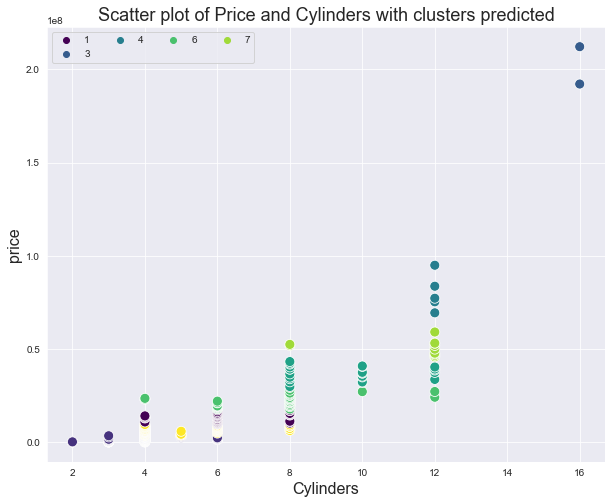

In [8]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, y='Ex-Showroom_Price', x='Cylinders',s=100,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of Price and Cylinders with clusters predicted', fontsize=18)
plt.xlabel('Cylinders',fontsize=16)
plt.ylabel('price',fontsize=16);

(0.0, 40000000.0)

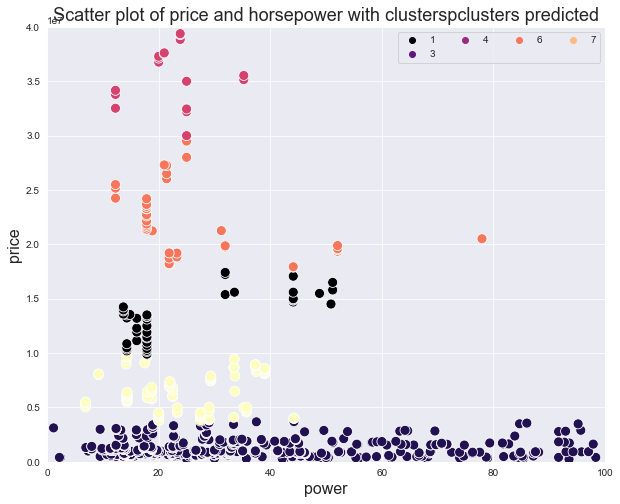

In [13]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, y='Ex-Showroom_Price', x='Power',s=100,hue='cluster',palette='magma')
plt.legend(ncol=4)
plt.title('Scatter plot of price and horsepower with clusterspclusters predicted', fontsize=18)
plt.xlabel('power',fontsize=16)
plt.ylabel('price',fontsize=16);
plt.xlim(0,100)
plt.ylim(0,40000000)

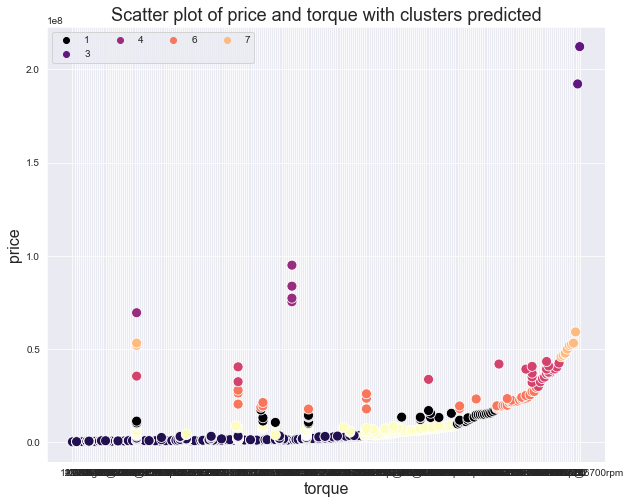

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, y='Ex-Showroom_Price', x='Torque',s=100,hue='cluster',palette='magma')
plt.legend(ncol=4)
plt.title('Scatter plot of price and torque with clusters predicted', fontsize=18)
plt.xlabel('torque',fontsize=16)
plt.ylabel('price',fontsize=16);

In [ ]:
#Analysing Data Features Based on Displacement

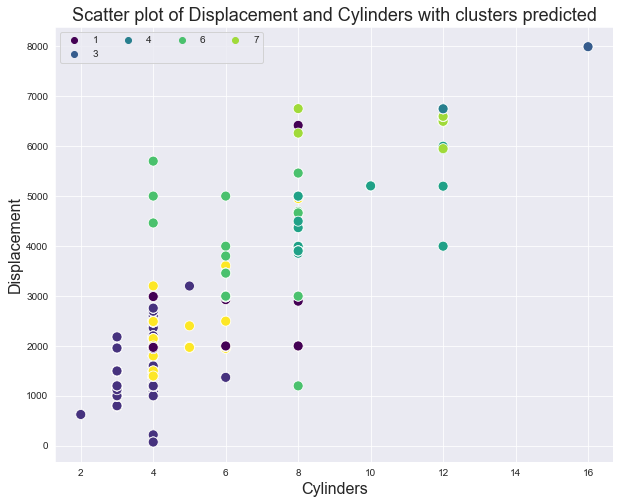

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, y='Displacement', x='Cylinders',s=100,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of Displacement and Cylinders with clusters predicted', fontsize=18)
plt.xlabel('Cylinders',fontsize=16)
plt.ylabel('Displacement',fontsize=16);

(0.0, 100.0)

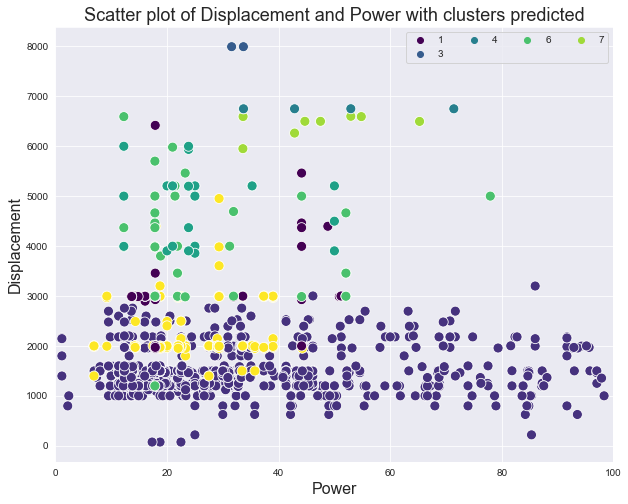

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, y='Displacement', x='Power',s=100,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of Displacement and Power with clusters predicted', fontsize=18)
plt.xlabel('Power',fontsize=16)
plt.ylabel('Displacement',fontsize=16);
plt.xlim(0,100)

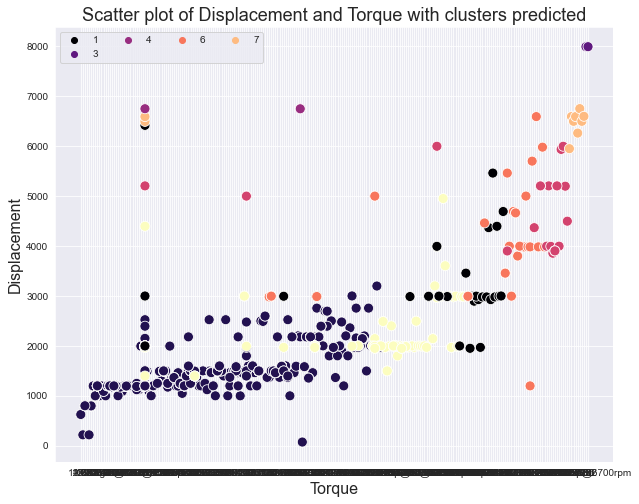

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, y='Displacement', x='Torque',s=100,hue='cluster',palette='magma')
plt.legend(ncol=4)
plt.title('Scatter plot of Displacement and Torque with clusters predicted', fontsize=18)
plt.xlabel('Torque',fontsize=16)
plt.ylabel('Displacement',fontsize=16);

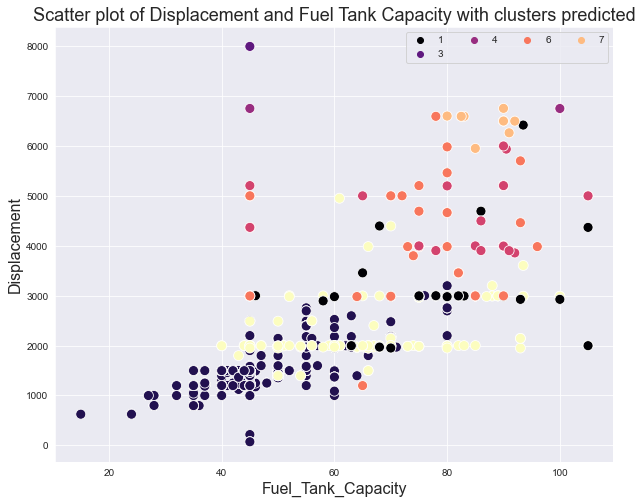

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, y='Displacement', x='Fuel_Tank_Capacity',s=100,hue='cluster',palette='magma')
plt.legend(ncol=4)
plt.title('Scatter plot of Displacement and Fuel Tank Capacity with clusters predicted', fontsize=18)
plt.xlabel('Fuel_Tank_Capacity',fontsize=16)
plt.ylabel('Displacement',fontsize=16);

In [ ]:
#Analysis on the basis of total cylinders

(0.0, 100.0)

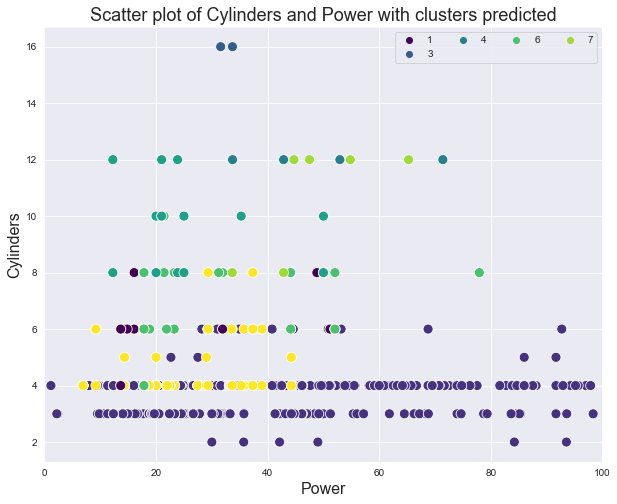

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, y='Cylinders', x='Power',s=100,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of Cylinders and Power with clusters predicted', fontsize=18)
plt.xlabel('Power',fontsize=16)
plt.ylabel('Cylinders',fontsize=16);
plt.xlim(0,100)

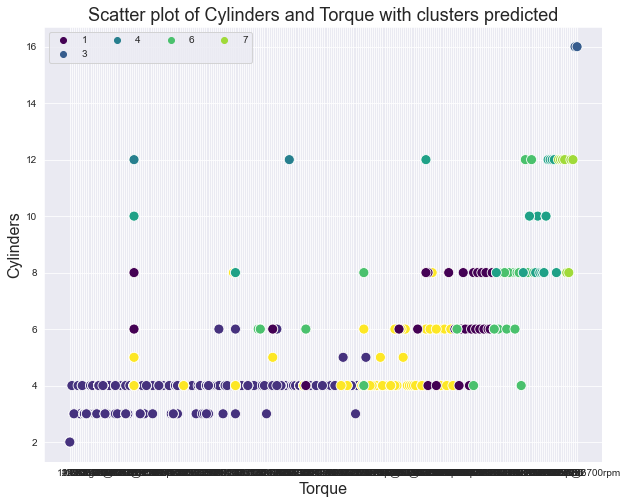

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, y='Cylinders', x='Torque',s=100,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of Cylinders and Torque with clusters predicted', fontsize=18)
plt.xlabel('Torque',fontsize=16)
plt.ylabel('Cylinders',fontsize=16);

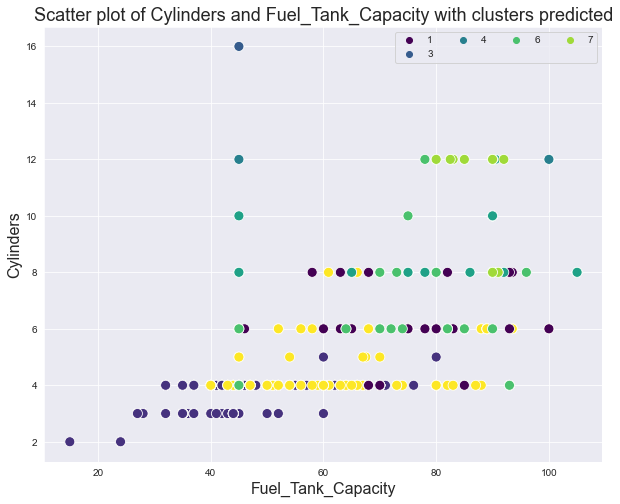

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, y='Cylinders', x='Fuel_Tank_Capacity',s=100,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of Cylinders and Fuel_Tank_Capacity with clusters predicted', fontsize=18)
plt.xlabel('Fuel_Tank_Capacity',fontsize=16)
plt.ylabel('Cylinders',fontsize=16);

(0.0, 50.0)

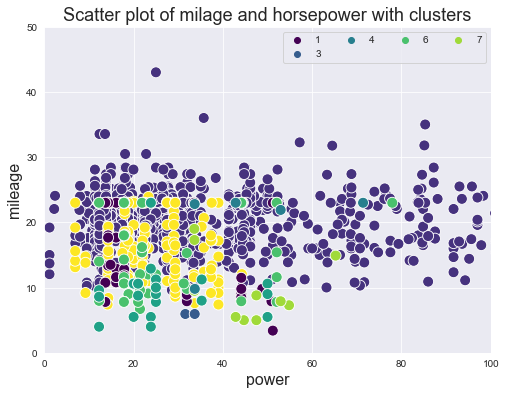

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Power', y='ARAI_Certified_Mileage',s=120,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of milage and horsepower with clusters', fontsize=18);
plt.xlabel('power',fontsize=16)
plt.ylabel('mileage',fontsize=16);
plt.xlim(0, 100)
plt.ylim(0,50)

(0.0, 100.0)

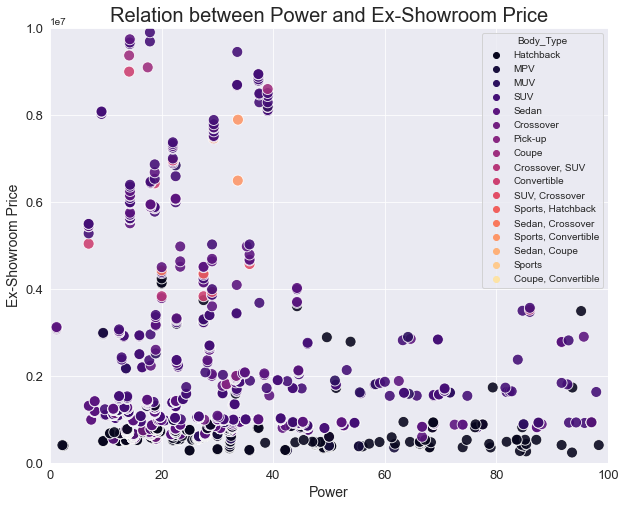

In [17]:
# Relationship between power and price

plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Power', y='Ex-Showroom_Price',hue='Body_Type',palette='magma',alpha=.89, s=120 );
plt.xticks(fontsize=13);
plt.yticks(fontsize=13)
plt.xlabel('Power',fontsize=14)
plt.ylabel('Ex-Showroom Price',fontsize=14)
plt.title('Relation between Power and Ex-Showroom Price',fontsize=20);
plt.ylim(0,10000000)
plt.xlim(0,100)

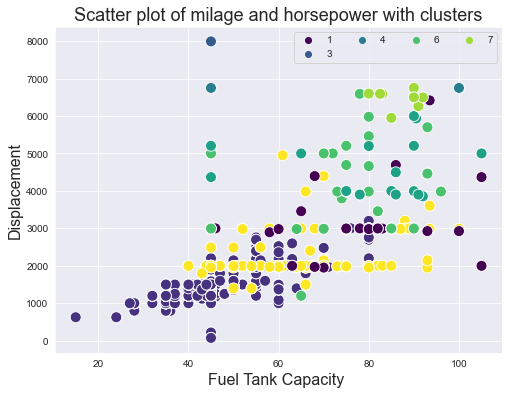

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Fuel_Tank_Capacity', y='Displacement',s=120,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of milage and horsepower with clusters', fontsize=18);
plt.xlabel('Fuel Tank Capacity ',fontsize=16)
plt.ylabel('Displacement',fontsize=16);

In [24]:
fig = px.scatter_3d(df, x='Power', z='Ex-Showroom_Price', y='ARAI_Certified_Mileage',color='cluster',
                    height=700, width=800,color_discrete_sequence=sns.color_palette('colorblind',n_colors=8,desat=1).as_hex(),
                   title='price power, and mileage')
fig.update_layout(yaxis_range=[0,100])
fig.update_layout(xaxis_range=[0,100])
fig.show()

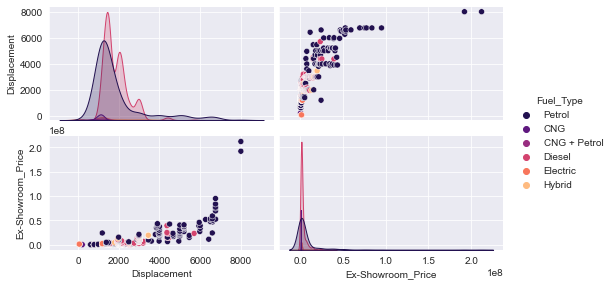

In [25]:
sns.pairplot(df,vars=[ 'Displacement', 'Ex-Showroom_Price'], hue= 'Fuel_Type', palette=sns.color_palette('magma'),diag_kind='kde',height=2, aspect=1.8);